In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import imblearn

In [2]:
data = pd.read_csv('DATASETS/twitter-airline-sentiment/Tweets.csv')

In [3]:
data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


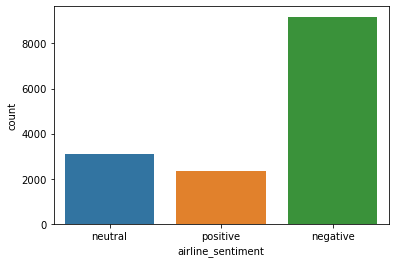

In [5]:
sns.countplot(data["airline_sentiment"])
plt.show()

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


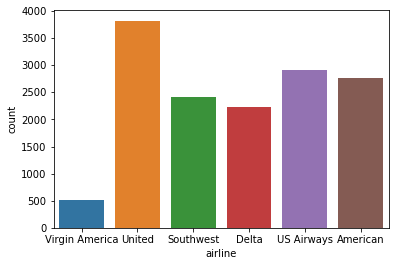

In [6]:
sns.countplot(data["airline"])
plt.show()

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


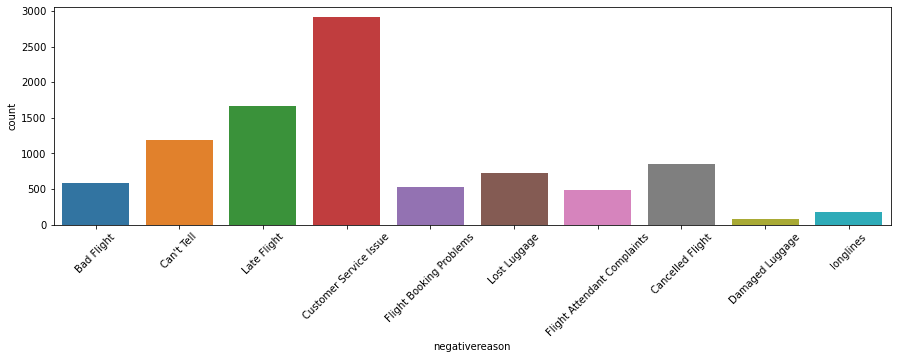

In [7]:
plt.figure(figsize=(15,4))
sns.countplot(data["negativereason"])
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder 
lbl = LabelEncoder()
data["airline_sentiment"] = lbl.fit_transform(data["airline_sentiment"])

In [9]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


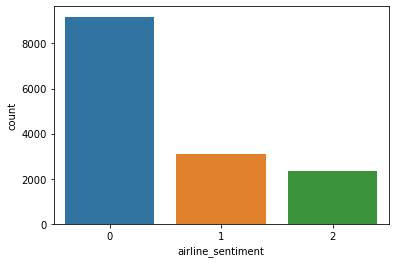

In [10]:
sns.countplot(data["airline_sentiment"])
plt.show()

In [11]:
X = data["text"]
y = data["airline_sentiment"] 

In [12]:
X.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
X = tfid.fit_transform(X)

In [14]:
y.value_counts()

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote = SMOTE(sampling_strategy='not majority')

In [17]:
X_sm ,y_sm = smote.fit_resample(X,y)

In [18]:
y_sm.value_counts()

2    9178
1    9178
0    9178
Name: airline_sentiment, dtype: int64

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


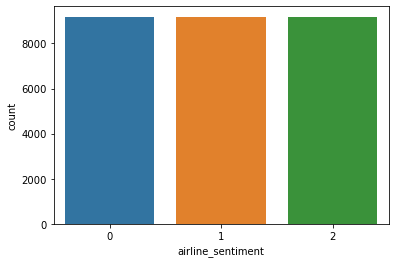

In [19]:
sns.countplot(y_sm)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=.2)

In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [22]:
model.fit(X_train,y_train)

MultinomialNB()

In [23]:
pred_y = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,pred_y)

array([[1569,  134,   71],
       [ 286, 1441,  140],
       [  90,   93, 1683]], dtype=int64)

In [25]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1774
           1       0.86      0.77      0.82      1867
           2       0.89      0.90      0.90      1866

    accuracy                           0.85      5507
   macro avg       0.85      0.85      0.85      5507
weighted avg       0.85      0.85      0.85      5507



In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
pred_y = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,pred_y)
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1774
           1       0.84      0.86      0.85      1867
           2       0.91      0.92      0.92      1866

    accuracy                           0.87      5507
   macro avg       0.87      0.87      0.87      5507
weighted avg       0.87      0.87      0.87      5507



C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred_y = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,pred_y)
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1774
           1       0.91      0.88      0.89      1867
           2       0.95      0.92      0.93      1866

    accuracy                           0.90      5507
   macro avg       0.90      0.90      0.90      5507
weighted avg       0.90      0.90      0.90      5507



In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)
pred_y = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,pred_y)
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1774
           1       0.91      0.88      0.90      1867
           2       0.95      0.92      0.93      1866

    accuracy                           0.90      5507
   macro avg       0.91      0.90      0.90      5507
weighted avg       0.91      0.90      0.91      5507

